http://theprofessionalspoint.blogspot.com/2019/06/100-basic-deep-learning-interview.html

Vector data—2D tensors of shape (samples, features)

Timeseries data or sequence data—3D tensors of shape (samples, timesteps,features)

# Deep Learning

__Artificial Neural Networks:__ Used for Regression and Classification. Example simple text data.

__Convolutional Neural Networks:__ Used for image classification and computer vision.

__Recurrent Neural Networks:__ Used for Time Series Analysis and Long Short Term Memory. Example translation from one language to another.

Unsupervised Deep Learning: Learning on their own. Has primarily three types of models :

__Self Organizing Maps:__ Used for feature detection

__Deep Boltzmann Machines:__ Used for recommendation systems

__Auto Encoders:__ Used for recommendation systems


# Keras
The core data structures of Keras are layers and models. The simplest type of model is the Sequential model, a linear stack of layers. 


### Softmax
Softmax is an activation function that generates the output between zero and one. It divides each output, such that the total sum of the outputs is equal to one. Softmax is often used for output layers.

### What is the difference between categorical_crossentropy and sparse_categorical_crossentropy? Which one to use and when?

For one hot encoded labels, use categorical_crossentropy. Otherwise, use sparse_categorical_crossentropy.

# Hyper-parameters

1. Number of hidden layers
2. Number of units or neuron in each layer
3. Dropout
4. Activation function
5. Learning rate
6. Momentum
7. Number of epoch
8. Batch size


## Hyperparametere tunings

1. Grid search
2. Random Search
3. Cross validation
4. Coordinate descent



# What Is the Difference Between Epoch, Batch, and Iteration in Deep Learning?

Epoch - Represents one iteration over the entire dataset (everything put into the training model).

Batch - Refers to when we cannot pass the entire dataset into the neural network at once, so we divide the dataset into several batches.

Iteration - if we have 10,000 images as data and a batch size of 200. then an epoch should run 50 iterations (10,000 divided by 50).

There are mainly four activation functions (step, sigmoid, tanh and relu) used in neural networks in deep learning. These activation functions help in achieving non-linearity in deep learning models. If we don't use these non-linear activation functions, neural network would not be able to solve the complex real life problems like image, video, audio, voice and text processing, natural language processing etc. because our neural network would still be linear and linear models cannot solve real life complex problems. 

## Deciding size of layers

There is no known way to determine a good network structure evaluating the number of inputs or outputs. It relies on the number of training examples, batch size, number of epochs, basically, in every significant parameter of the network.

Moreover, a high number of units can introduce problems like overfitting and exploding gradient problems. On the other side, a lower number of units can cause a model to have high bias and low accuracy values. Once again, it depends on the size of data used for training.

Sadly it is trying some different values that give you the best adjustments. You may choose the combination that gives you the lowest loss and validation loss values, as well as the best accuracy for your dataset, as said in the previous post.

## How Are Weights Initialized in a Network?
There are two methods here: we can either initialize the weights to zero or assign them randomly.

Initializing all weights to 0: This makes your model similar to a linear model. All the neurons and every layer perform the same operation, giving the same output and making the deep net useless.

Initializing all weights randomly: Here, the weights are assigned randomly by initializing them very close to 0. It gives better accuracy to the model since every neuron performs different computations. This is the most commonly used method.

## Flatten layer
Flattening a tensor means to remove all of the dimensions except for one.A Flatten layer in Keras reshapes the tensor to have a shape that is equal to the number of elements contained in the tensor. This is the same thing as making a 1d-array of elements.

## Dense layer
Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer. In the last layer we have to specify output dimensions/classes of the model. Here it's 10, since we have to output 10 different digit labels.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
layers = tf.keras.layers
import numpy as np
print(tf.__version__)

2.0.0-rc1


In [30]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# We perform a grayscale normalization to reduce the effect of illumination's differences.
# Moreover the CNN converg faster on [0..1] data than on [0..255].
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalizing helps faster convergence of model

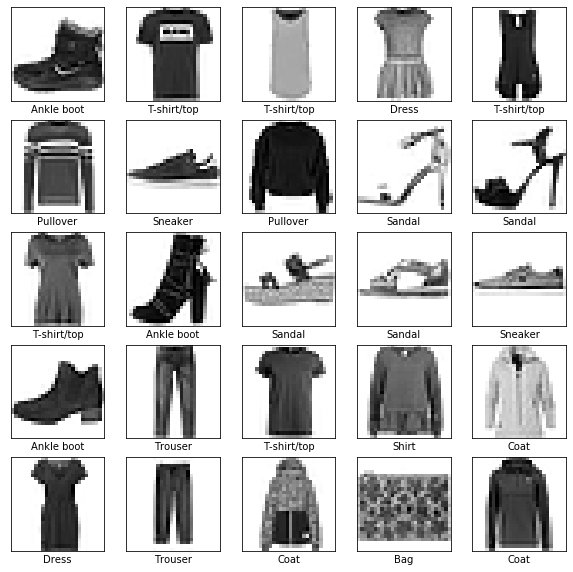

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(x_train[i], cmap=plt.cm.binary)
 plt.xlabel(class_names[y_train[i]])
plt.show()

## Build model

In [35]:
model = tf.keras.Sequential()
model.add(layers.Flatten()) # flattern converts matrix to single array or 1d array
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.2)) # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

## Compile network

Keras is built on top of Theano (and now TensorFlow as well), both packages that allow you to define a computation graph in Python, which they then compile and run efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your loss function and your optimizer. The loss function we'll use here is called categorical crossentropy, and is a loss function well-suited to comparing two probability distributions.

Here our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. More detail at Wikipedia

The optimizer helps determine how quickly the model learns, how resistent it is to getting "stuck" or "blowing up". We won't discuss this in too much detail, but "adam" is often a good choice (developed here at U of T).

   - A loss function: to measure how good the network is
   - An optimizer: to update network as it sees more data and reduce loss value
   - Metrics: to monitor performance of network

In [36]:
model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [37]:
history = model.fit(x_train, y_train, epochs=5,validation_split=0.2,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 - 5s - loss: 0.5316 - accuracy: 0.8119 - val_loss: 0.4308 - val_accuracy: 0.8400
Epoch 2/5
48000/48000 - 4s - loss: 0.3875 - accuracy: 0.8579 - val_loss: 0.3832 - val_accuracy: 0.8599
Epoch 3/5
48000/48000 - 4s - loss: 0.3470 - accuracy: 0.8718 - val_loss: 0.3847 - val_accuracy: 0.8620
Epoch 4/5
48000/48000 - 4s - loss: 0.3243 - accuracy: 0.8818 - val_loss: 0.3472 - val_accuracy: 0.8758
Epoch 5/5
48000/48000 - 4s - loss: 0.3091 - accuracy: 0.8852 - val_loss: 0.3530 - val_accuracy: 0.8736


In [29]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.242306,0.909563,0.349851,0.883333
1,0.235371,0.911062,0.336731,0.886583
2,0.230265,0.913271,0.323697,0.890750
3,0.220775,0.916313,0.379194,0.882000
4,0.216426,0.917896,0.335744,0.889333


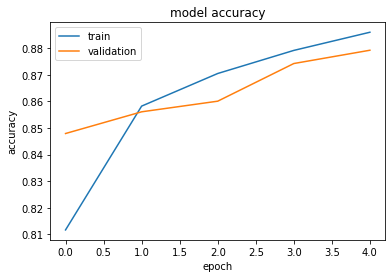

In [16]:
#  Accuracy vs epoch 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


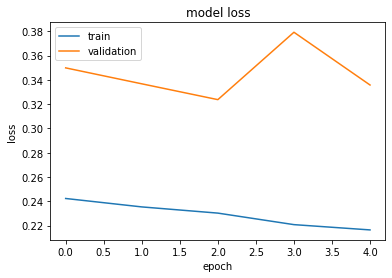

In [23]:
# Loss vs Epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import keras
from keras.utils.vis_utils import plot_model


keras.utils.model_to_dot(
    model,
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    subgraph=False,
)

In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.38046186873912813
Test accuracy: 0.8631
